---

## **About Author:**

---

[<img src="https://media.licdn.com/dms/image/v2/D4D03AQEsEJ_gVNnU3w/profile-displayphoto-shrink_200_200/profile-displayphoto-shrink_200_200/0/1720678393429?e=2147483647&v=beta&t=RALfVAKvT6TmP2BBpil_CGzZK5L5ykNUou5yModXTVw" width="20%">](https://shaheer.kesug.com)

**Mr. ShaheerAli**  
*Data Scientist / ML Engineer*\
BS Computer Science

<a href="https://www.youtube.com/channel/UCUTphw52izMNv9W6AOIFGJA">
  <img width="50" height="50" src="https://img.icons8.com/color/48/youtube-play.png" alt="youtube-play"/>
</a>
<a href="https://twitter.com/__shaheerali190">
  <img width="50" height="50" src="https://img.icons8.com/dotty/80/x.png" alt="x"/>
</a>
<a href="https://www.linkedin.com/in/shaheer-ali-2761aa303/">
  <img width="50" height="50" src="https://img.icons8.com/color/48/linkedin.png" alt="linkedin"/>
</a>
<a href="https://github.com/shaheeralics">
  <img width="50" height="50" src="https://img.icons8.com/ios-glyphs/50/github.png" alt="github"/>
</a>
<a href="https://www.kaggle.com/shaheerali197">
  <img width="50" height="50" src="https://img.icons8.com/clouds/100/kaggle.png" alt="kaggle"/>
</a>

[Portfolio Site]('https://shaheer.kesug.com')

---

# Import Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

Import the data

In [2]:
df=pd.read_csv('/kaggle/input/lung-cancer-detection/survey lung cancer.csv')

read sample of data

In [3]:
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [4]:
df.tail(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


# EDA

In [5]:
df.shape

(309, 16)

In [6]:
#checking datatypes
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [7]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [8]:
df.describe(include="object")

,GENDER,LUNG_CANCER
count,309,309
unique,2,2
top,M,YES
freq,162,270


In [9]:
df.columns.tolist()

['GENDER',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN',
 'LUNG_CANCER']

In [10]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

check repeated rows

In [11]:
df.duplicated().sum()

33

In [12]:
#remove repeated rows
df.drop_duplicates(inplace=True)
# check that removing is done
df.duplicated().sum()

0

In [13]:
df['GENDER']=df['GENDER'].replace(['M', 'F'],[0,1])
df['LUNG_CANCER']=df['LUNG_CANCER'].replace(['YES', 'NO'],[1,0])

# target column

In [14]:
 #Patient has lung cancer = 1 , Patient not having lung cancer = 0
df['LUNG_CANCER'].unique()

array([1, 0])

In [15]:
# Canceled=1, Not canceled= 0
df['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    238
0     38
Name: count, dtype: int64

# Show value counts for each coluumn

In [16]:
coluumns =['GENDER', 'AGE', 'SMOKING','YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
    
    
for col in coluumns:
    d_type = df[col].dtype
    
    counts =df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("============================================================")

Counts for GENDER:
GENDER
0    142
1    134
Name: count, dtype: int64
Counts for AGE:
AGE
64    18
60    16
56    16
62    16
59    15
63    15
70    14
61    14
67    11
69    10
55    10
72    10
68     9
71     9
57     9
77     9
58     8
54     7
74     6
65     5
51     5
75     5
73     4
52     4
53     4
66     4
76     3
47     3
49     3
48     2
44     2
78     2
81     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64
Counts for SMOKING:
SMOKING
2    150
1    126
Name: count, dtype: int64
Counts for YELLOW_FINGERS:
YELLOW_FINGERS
2    159
1    117
Name: count, dtype: int64
Counts for ANXIETY:
ANXIETY
1    139
2    137
Name: count, dtype: int64
Counts for PEER_PRESSURE:
PEER_PRESSURE
2    140
1    136
Name: count, dtype: int64
Counts for CHRONIC DISEASE:
CHRONIC DISEASE
2    144
1    132
Name: count, dtype: int64
Counts for FATIGUE :
FATIGUE 
2    183
1     93
Name: count, dtype: int64
Counts for ALLERGY :
ALLERGY 
2    151
1    125
Name: cou

# Data Visualization

Distribution of numerical columns

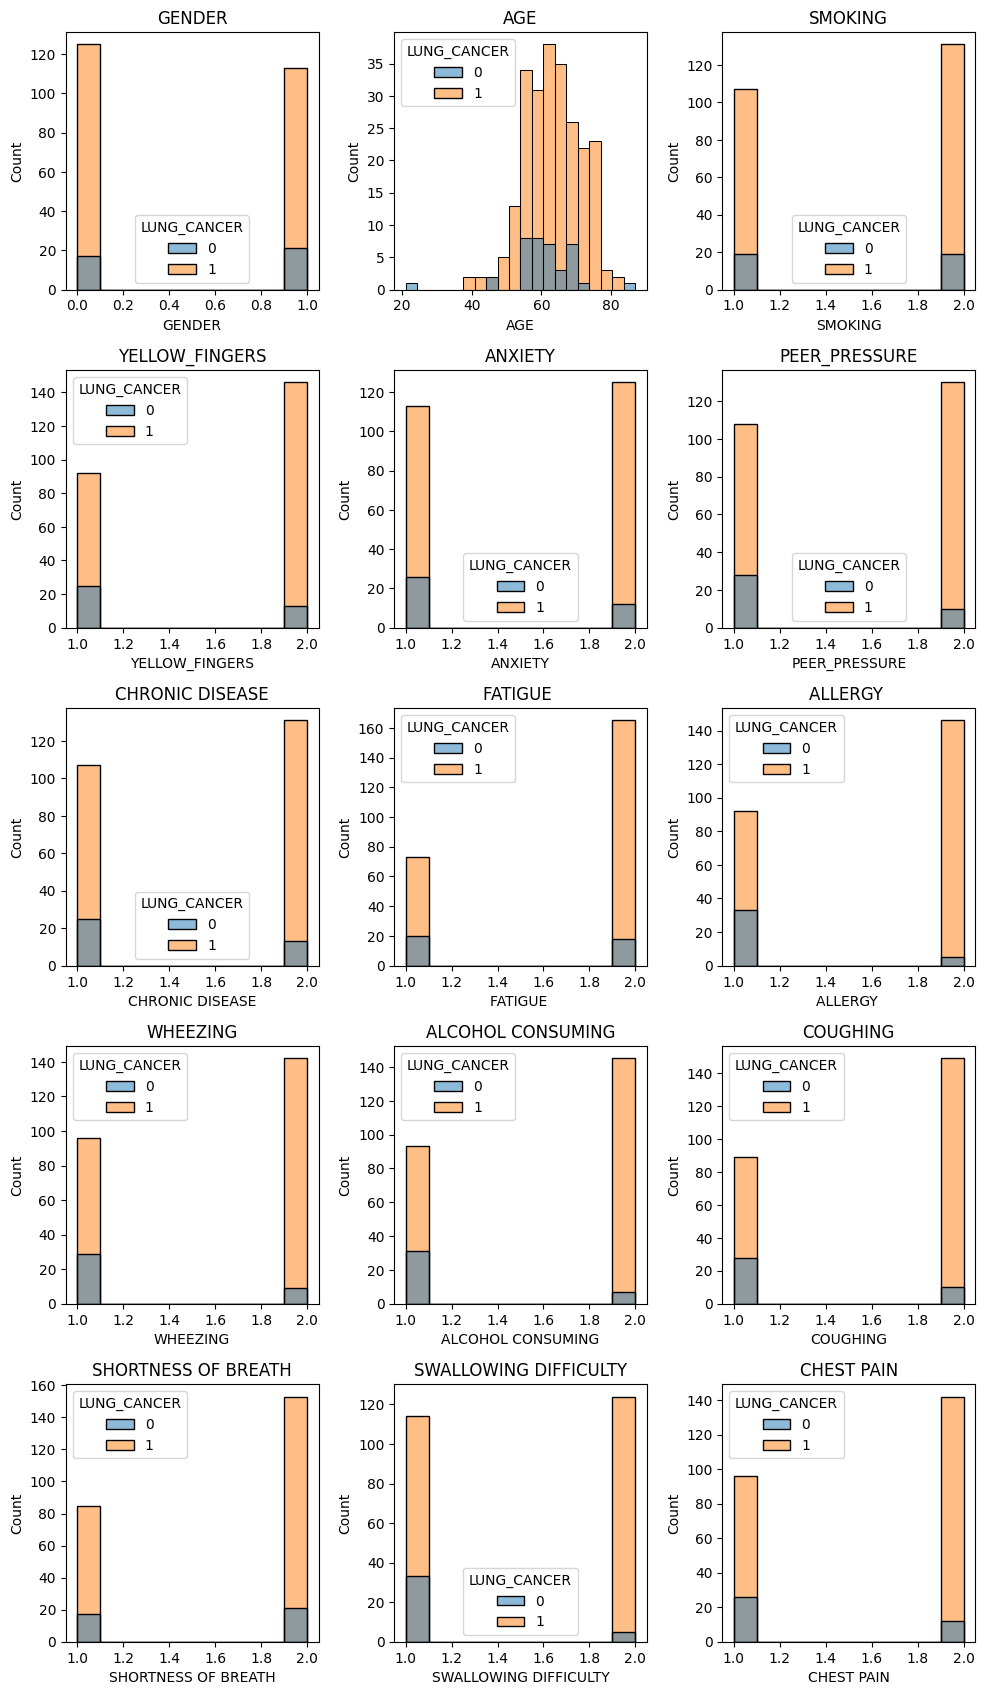

In [17]:
num_list=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
fig = plt.figure(figsize=(10,20))

for i in range(len(num_list)):
    plt.subplot(6,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df,x=df[num_list[i]],hue='LUNG_CANCER')

plt.tight_layout()

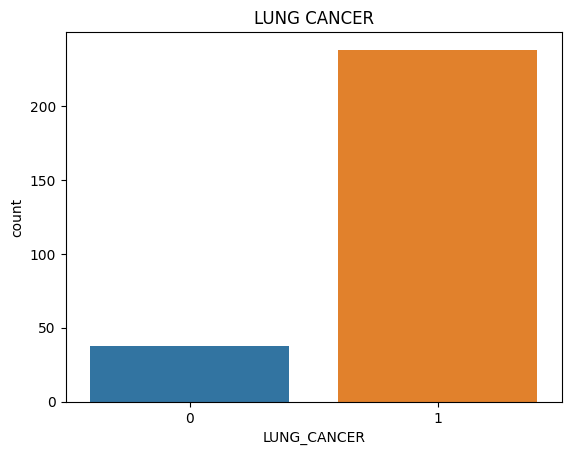

In [18]:
#target column
sns.countplot(x=df['LUNG_CANCER'])
plt.title('LUNG CANCER');

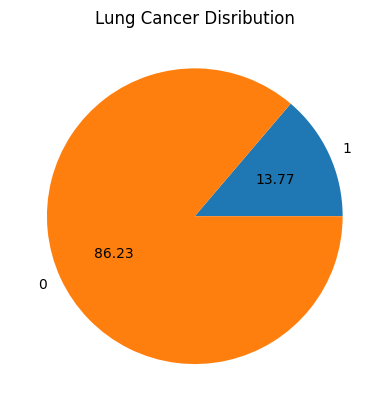

In [19]:
#Another graph for "is_canceled" column 
plt.pie(df.groupby(by=["LUNG_CANCER"]).size(), labels = df["LUNG_CANCER"].unique(), autopct = "%0.2f")
plt.title('Lung Cancer Disribution');
plt.show()

Gender Disription

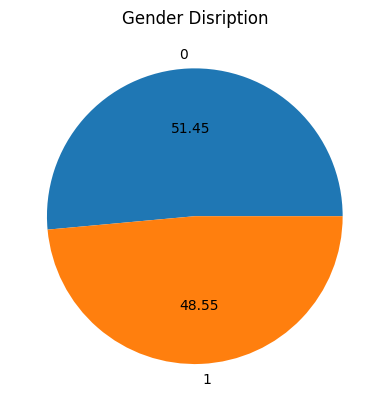

In [20]:
plt.pie(df.groupby(by=["GENDER"]).size(), labels = df["GENDER"].unique(), autopct = "%0.2f")
plt.title('Gender Disription')
plt.show()

AGE Disription

<Axes: xlabel='AGE', ylabel='Density'>

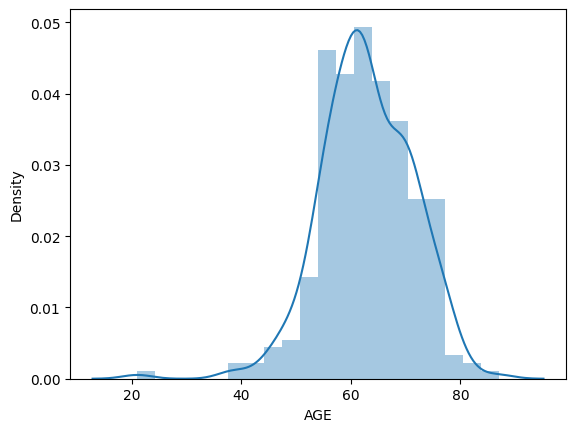

In [21]:
sns.distplot(df['AGE'])

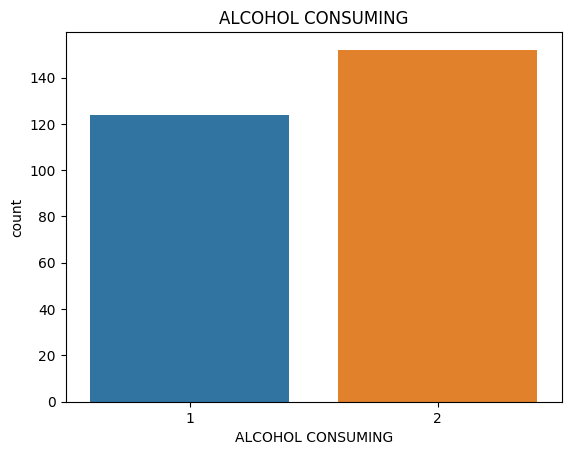

In [22]:
sns.countplot(x=df['ALCOHOL CONSUMING'])
plt.title('ALCOHOL CONSUMING');

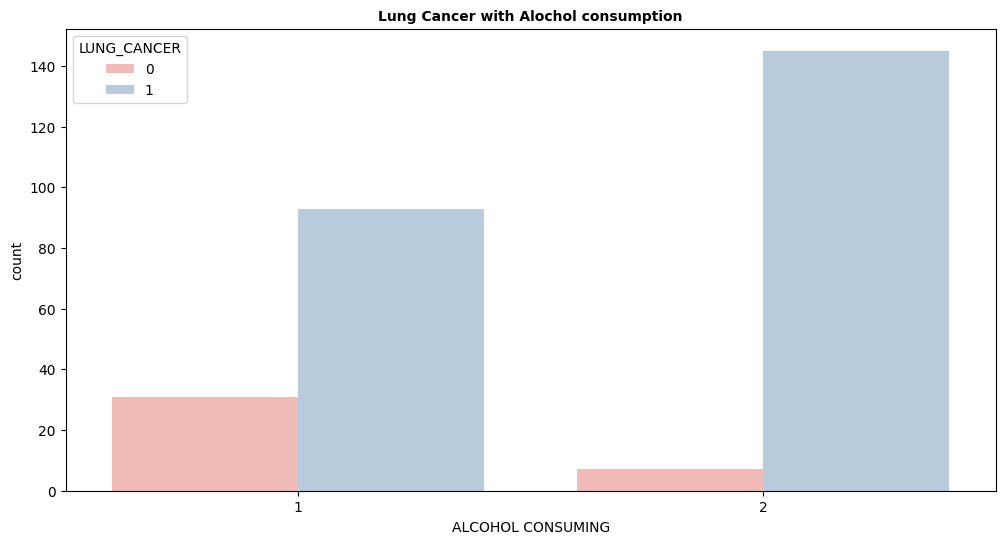

In [23]:
plt.figure(figsize=(12, 6))

sns.countplot(x='ALCOHOL CONSUMING',hue="LUNG_CANCER", data=df,palette='Pastel1')
plt.title("Lung Cancer with Alochol consumption",fontweight="bold", size=10)
plt.show()


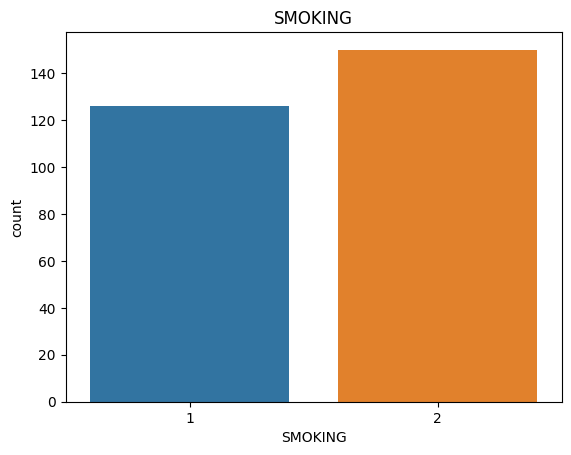

In [24]:
sns.countplot(x=df['SMOKING'])
plt.title('SMOKING');

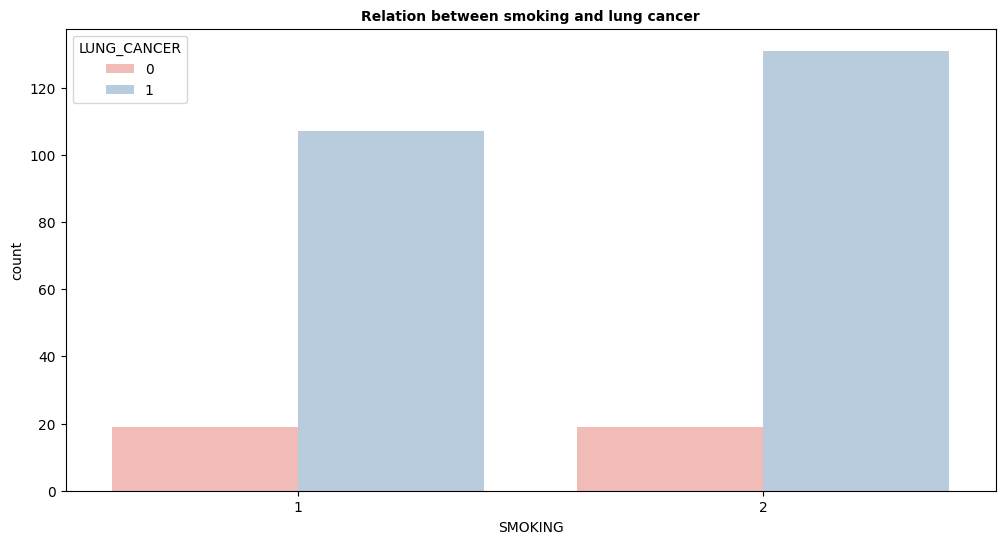

In [25]:
plt.figure(figsize=(12, 6))

sns.countplot(x='SMOKING',hue="LUNG_CANCER", data=df,palette='Pastel1')
plt.title("Relation between smoking and lung cancer",fontweight="bold", size=10)
plt.show()


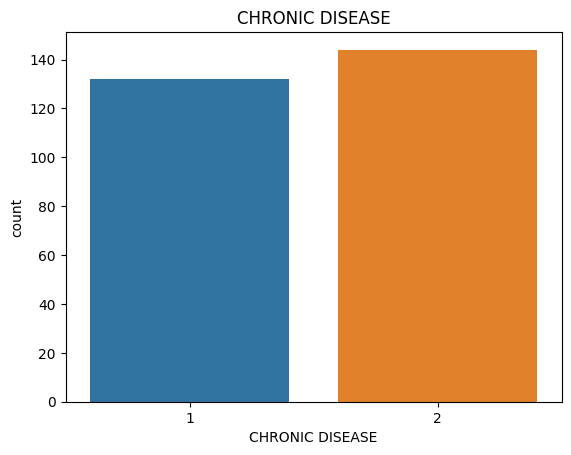

In [26]:
sns.countplot(x=df['CHRONIC DISEASE'])
plt.title('CHRONIC DISEASE');

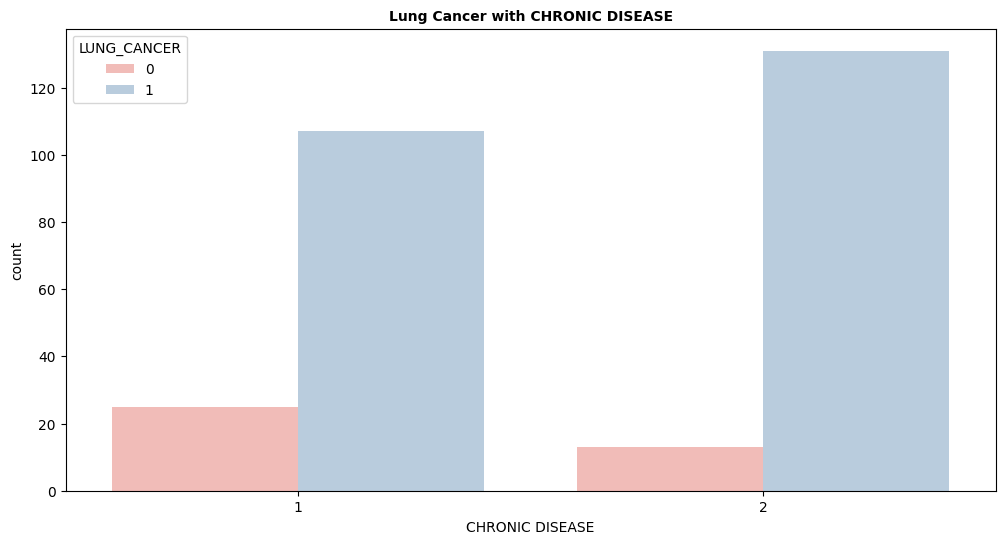

In [27]:
plt.figure(figsize=(12, 6))

sns.countplot(x='CHRONIC DISEASE',hue="LUNG_CANCER", data=df,palette='Pastel1')
plt.title("Lung Cancer with CHRONIC DISEASE",fontweight="bold", size=10)
plt.show()


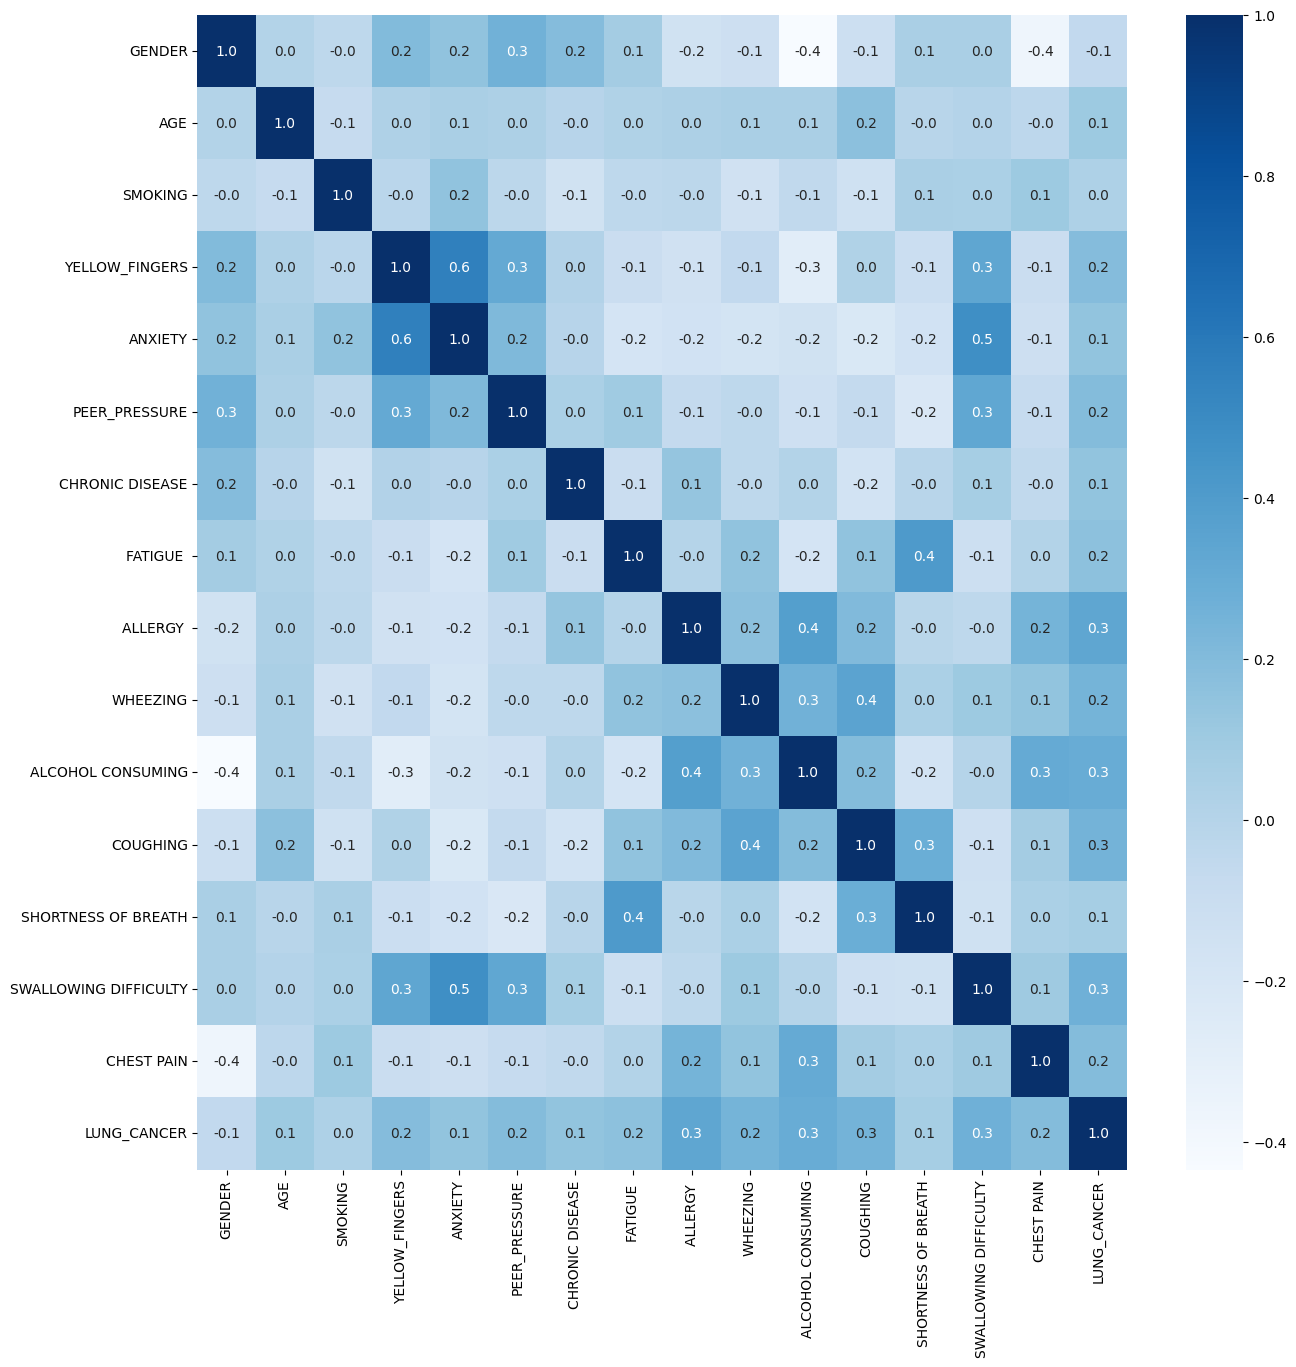

In [28]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True, cbar=True, cmap='Blues', fmt='.1f');

In [29]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

In [30]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

# SVM

In [31]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [32]:
svc.score(X_train , y_train)

0.9318181818181818

In [33]:
svc_pred = svc.predict(X_test)
svc_acc=accuracy_score(y_test , svc_pred)
svc_acc

0.9285714285714286

In [34]:
print(classification_report(y_test , svc_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56



Text(95.72222222222221, 0.5, 'Truh')

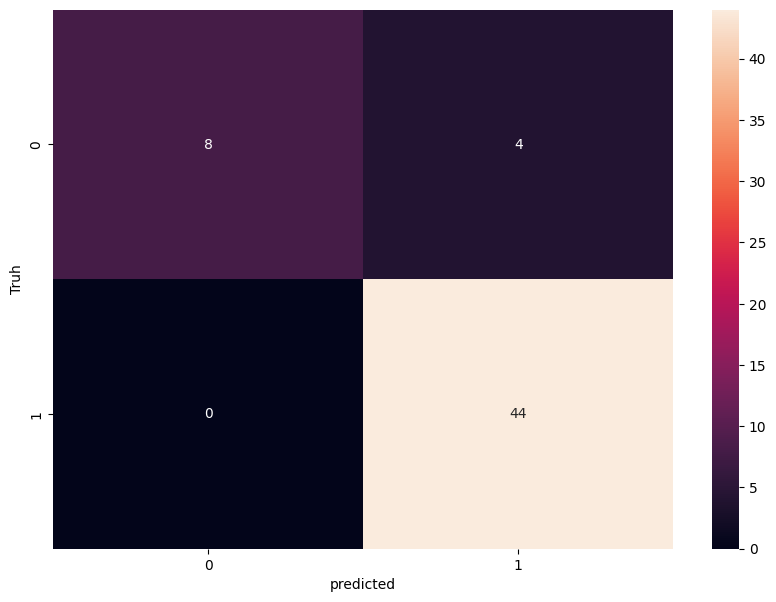

In [35]:
cm1 = confusion_matrix(y_test,svc_pred)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

# Random Forest

In [36]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train , y_train)

RandomForestClassifier()

In [37]:
RF_model.score(X_train , y_train)

1.0

In [38]:
RF_pred =RF_model.predict(X_test)
RF_acc=accuracy_score(y_test , RF_pred)
RF_acc

0.8571428571428571

In [39]:
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.85      1.00      0.92        44

    accuracy                           0.86        56
   macro avg       0.92      0.67      0.71        56
weighted avg       0.88      0.86      0.83        56



Text(95.72222222222221, 0.5, 'Truh')

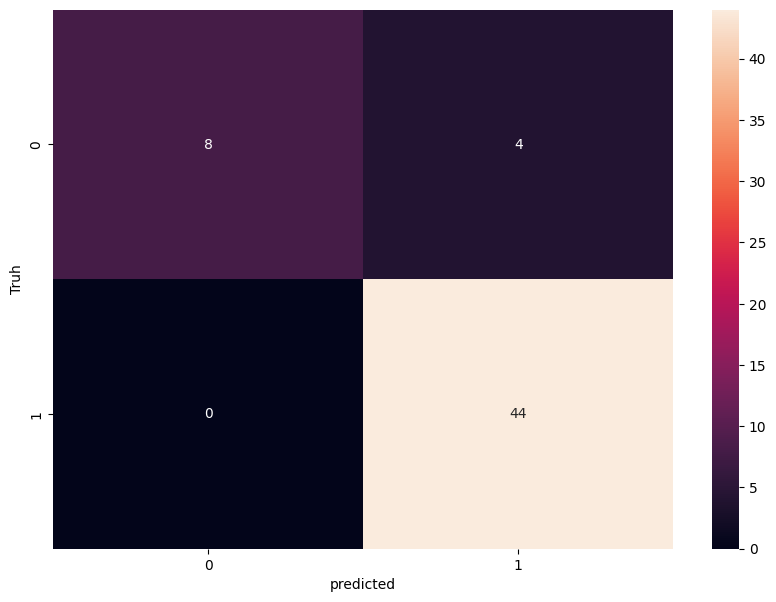

In [40]:
cm2 = confusion_matrix(y_test,RF_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

# Decision Tree

In [41]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
dt.score(X_train , y_train)

1.0

In [43]:
dt_pred = dt.predict(X_test)

In [44]:
DT_acc=accuracy_score(y_test , dt_pred)
DT_acc

0.9285714285714286

In [45]:
print(classification_report(y_test , dt_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56



Text(95.72222222222221, 0.5, 'Truth')

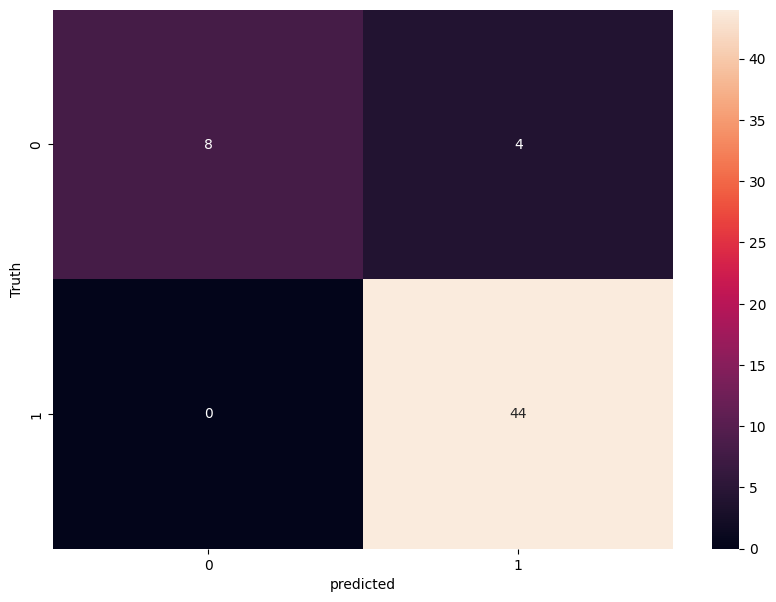

In [46]:
cm3 = confusion_matrix(y_test,dt_pred)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm3,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

# Models scores

In [47]:
models=pd.DataFrame({
    'models':['Random_forest','SVC','Decsion_Treee'],
    'scores':[RF_acc,svc_acc,DT_acc]})
models.sort_values(by='scores',ascending=True)

,models,scores
0,Random_forest,0.857143
1,SVC,0.928571
2,Decsion_Treee,0.928571
